# Polynomial Regression Model

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import threading

from numpy import character
from parso.python.tree import String

## Importing Dataset

In [98]:
data = pd.read_csv("/workspaces/Supervised-Machine-Learning/Datasets/Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [99]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Plotting the data

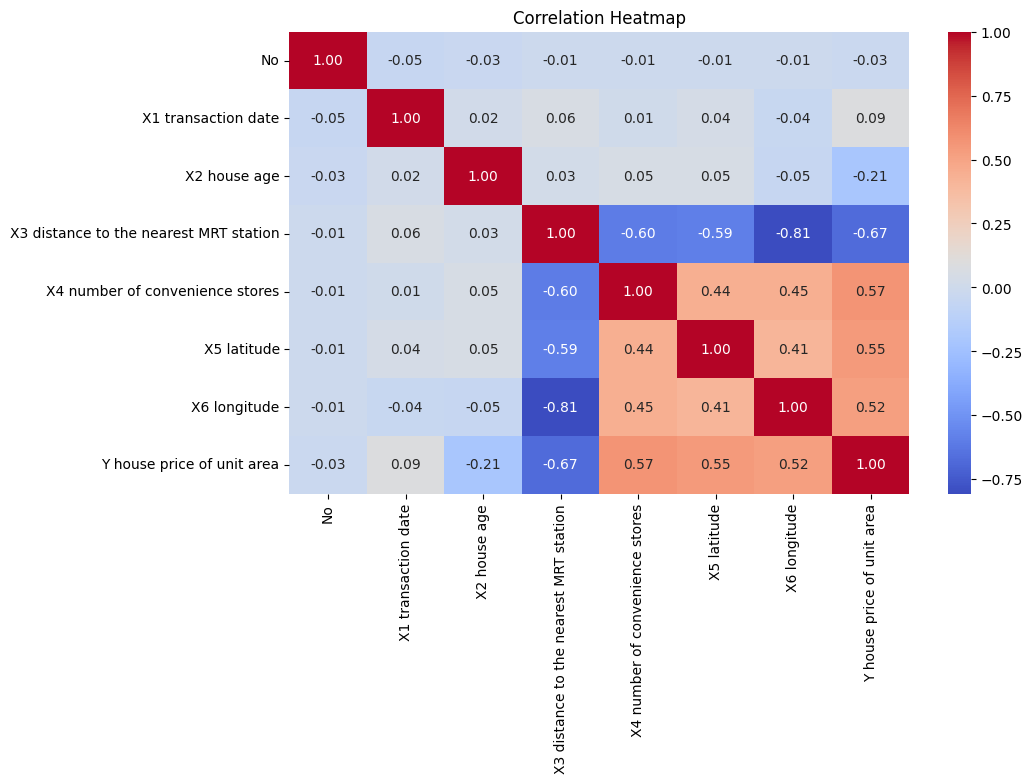

In [101]:
import seaborn as sns

plt.figure(figsize=(10, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Splitting the Variables 

The Variable X4 is mostly corelated with the Y, and so we chose the variable for the Regression

In [102]:
X = data['X5 latitude']
y = data.iloc[:, -1]

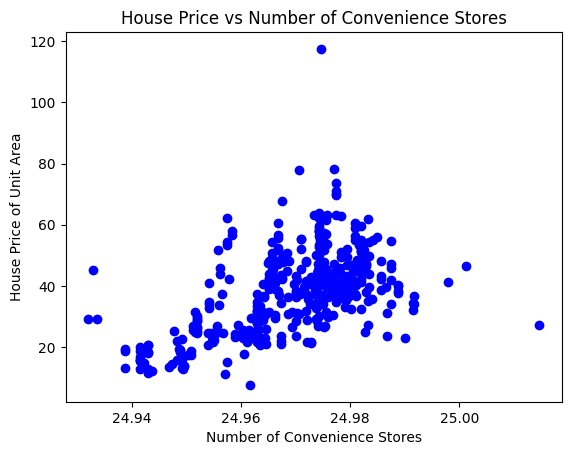

In [103]:
plt.scatter(X, y, color='blue')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('House Price of Unit Area')
plt.title('House Price vs Number of Convenience Stores')
plt.show()

## Splitting the data

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3642)

## Fitting the Polynomial Regression Model

In [105]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=30)
X_train_poly = poly.fit_transform(X_train.values.reshape(-1, 1))
X_test_poly = poly.transform(X_test.values.reshape(-1, 1))

model = LinearRegression()
model.fit(X_train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [106]:
y_pred = model.predict(X_test_poly)

## Output Visualisation

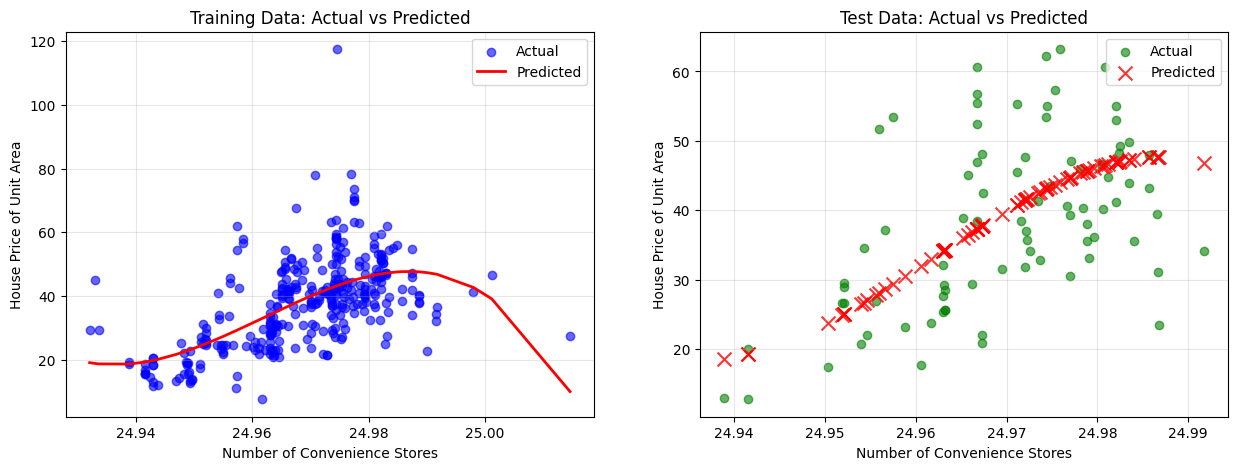

In [107]:
import matplotlib.pyplot as plt

# Create a figure with subplots for training and test data
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sort data for smooth plotting
X_train_sorted = np.sort(X_train.values)
X_train_poly_sorted = poly.transform(X_train_sorted.reshape(-1, 1))
y_train_pred_sorted = model.predict(X_train_poly_sorted)

# Plot Training Data
axes[0].scatter(X_train, y_train, color='blue', label='Actual', alpha=0.6)
axes[0].plot(X_train_sorted, y_train_pred_sorted, color='red', linewidth=2, label='Predicted')
axes[0].set_xlabel('Number of Convenience Stores')
axes[0].set_ylabel('House Price of Unit Area')
axes[0].set_title('Training Data: Actual vs Predicted')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot Test Data
axes[1].scatter(X_test, y_test, color='green', label='Actual', alpha=0.6)
axes[1].scatter(X_test, y_pred, color='red', marker='x', s=100, label='Predicted', alpha=0.8)
axes[1].set_xlabel('Number of Convenience Stores')
axes[1].set_ylabel('House Price of Unit Area')
axes[1].set_title('Test Data: Actual vs Predicted')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.show()

## Performance Metrics

In [108]:
# Print model performance metrics
from sklearn.metrics import mean_squared_error, r2_score

train_pred = model.predict(X_train_poly)
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {np.sqrt(train_mse):.4f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"\nTest MSE: {test_mse:.4f}")
print(f"Test RMSE: {np.sqrt(test_mse):.4f}")
print(f"Test R² Score: {test_r2:.4f}")

Training MSE: 120.6652
Training RMSE: 10.9848
Training R² Score: 0.3767

Test MSE: 104.9453
Test RMSE: 10.2443
Test R² Score: 0.2959


In [109]:
print("Polynomial Regression Model Coefficients:")
print(model.coef_)

Polynomial Regression Model Coefficients:
[ 6.43789831e-39 -5.69136377e-40 -6.84823204e-44 -1.64208268e-71
 -7.53484931e-63 -2.18016497e-61 -6.01042753e-60 -1.60513003e-58
 -4.18253788e-57 -1.06818268e-55 -2.68152970e-54 -6.62922021e-53
 -1.61580963e-51 -3.88546228e-50 -9.21958736e-49 -2.15835609e-47
 -4.98244442e-46 -1.13308084e-44 -2.53493709e-43 -5.56796609e-42
 -1.19742193e-40 -2.51156133e-39 -5.10986920e-38 -1.00038668e-36
 -1.86161674e-35 -3.22739022e-34 -5.02658448e-33 -6.51107977e-32
 -5.60369105e-31  4.36432979e-32 -8.46962560e-34]


In [110]:
print("Train and Test Scores:")
print(f"Train Score: {model.score(X_train_poly, y_train):.4f}")
print(f"Test Score: {model.score(X_test_poly, y_test):.4f}")

Train and Test Scores:
Train Score: 0.3767
Test Score: 0.2959


# **Model Optimisation**

**A framework to perform Polynomial Regression on dataset over a set range of Degree using multithreading.**

**Usage:**
   * Create an Object Instance of the class ModelOptimizer
   * Call the run() method to start the optimization process
   * Call the getPlots() method to plot the training and test data with the predicted values
   * Call the getPerformanceMetrics() method to get the performance metrics for each degree

**Returns:**
   * getPlots() - returns the Training and Test Data plots comparing between prediction and actual values
   * getPerformanceMetrics() - returns a dataframe containing the performance metrics for each degree

In [111]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import threading

class PolynomialRegression(threading.Thread):
    """
    A class to perform Polynomial Regression Model Optimisation
    The class inherits from threading.Thread, and hence the multiple models can be run simultaneously

    :param degree: The degree of the polynomial model
    :param X: Independent variable
    :param y: Dependent variable
    """
    def __init__(self, degree: float, X: pd.Series, y: pd.Series, random_state: int = 42) -> None:
        super().__init__()
        self.y_pred = None
        self.X_test_poly = None
        self.poly_features = None
        self.X_train_poly = None
        self.X_test = None
        self.X_train = None
        self.y_test = None
        self.y_train = None
        self.degree = degree
        self.model = LinearRegression()
        self.data_split(X, y, 0.2, random_state)
        
    def run(self) -> None:
        self.fit()
        self.Evaluation()

    def data_split(self, X: pd.Series , y: pd.Series, r: float, random_state: int) -> None:
        """
        Splits the data into training and test sets

        :param X:
        :param y:
        :param r:
        :return:
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=r, random_state=random_state)
    def fit(self) -> None:
        """
        Fits the polynomial regression model

        :return:
        """
        self.poly_features = PolynomialFeatures(degree=self.degree)
        self.X_train_poly = self.poly_features.fit_transform(self.X_train.values.reshape(-1, 1))
        self.X_test_poly = self.poly_features.transform(self.X_test.values.reshape(-1, 1))
        self.model.fit(self.X_train_poly, self.y_train)

    def Evaluation(self) -> None:
        """
        Performs evaluation on the test set and calculates performance metrics

        :return:
        """
        self.y_pred = self.model.predict(self.X_test_poly)
        self.rmse = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        self.r2 = r2_score(self.y_test, self.y_pred)
        self.mae = mean_absolute_error(self.y_test, self.y_pred)

    def plot(self) -> None:
        """
        When called plots the training and test data with the predicted values

        :return:
        """
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        X_train_sorted = np.sort(self.X_train.values)
        X_train_poly_sorted = self.poly_features.transform(X_train_sorted.reshape(-1, 1))
        y_train_pred_sorted = self.model.predict(X_train_poly_sorted)

        axes[0].scatter(self.X_train, self.y_train, color='blue', label='Actual', alpha=0.6)
        axes[0].plot(X_train_sorted, y_train_pred_sorted, color='red', linewidth=2, label='Predicted')
        axes[0].set_xlabel('Number of Convenience Stores')
        axes[0].set_ylabel('House Price of Unit Area')
        axes[0].set_title('Training Data: Actual vs Predicted')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        axes[1].scatter(self.X_test, self.y_test, color='green', label='Actual', alpha=0.6)
        axes[1].scatter(self.X_test, self.y_pred, color='red', marker='x', s=100, label='Predicted', alpha=0.8)
        axes[1].set_xlabel('Number of Convenience Stores')
        axes[1].set_ylabel('House Price of Unit Area')
        axes[1].set_title('Test Data: Actual vs Predicted')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.show()
    
    def predict(self, X_new: pd.Series) -> np.ndarray:
        """
        Predicts the target variable for new data

        :param X_new: New independent variable data
        :return: Predicted values
        """
        X_new_poly = self.poly_features.transform(X_new.values.reshape(-1, 1))
        return self.model.predict(X_new_poly)


In [112]:
from typing import AnyStr
class ModelOptimizer():
    """
    Wrapper class to perform Polynomial Regression Model Optimisation over a range of Degrees
    performs multithreading to run multiple models simultaneously

    :param X_variable: The name of the variable on which the model is to be trained
    :param Data: The dataset on which the model is to be trained
    :param minDegree: The minimum degree of the polynomial model to be trained
    :param maxDegree: The maximum degree of the polynomial model to be trained
    """
    def __init__(self, X_variable: AnyStr,
                  Data: pd.DataFrame,
                   minDegree: int = 0,
                     maxDegree: int = 100,
                       step: int = 5,
                         random_state: int = 42):
        self.PerformanceMetrics = {}
        self.models = {}
        self.X_variable = X_variable
        self.X = Data[X_variable]
        self.y = Data.iloc[:, -1]
        self.minDegree = minDegree
        self.maxDegree = maxDegree
        self.step = step
        self.threads = []
        self.random_state = random_state
    def run(self) -> None:
        """
        perform multithreading to run multiple models simultaneously

        :return:
        """
        for degree in range(self.minDegree, self.maxDegree, self.step):
            model = PolynomialRegression(degree, self.X, self.y, random_state=self.random_state)
            model.start()
            self.threads.append(model)

        for model in self.threads:
            model.join()

        for model in self.threads:
            degree = model.degree
            self.models[degree] = [model]
            self.PerformanceMetrics[degree] = {"RMSE": model.rmse, "R2": model.r2, "MAE": model.mae}

    def getPerformanceMetrics(self) -> pd.DataFrame:
        """
        Returns a dataframe containing the performance metrics for each degree

        :return pd.DataFrame containing the performance metrics:
        """
        return pd.DataFrame(self.PerformanceMetrics)
    
    def getBestFit(self) -> tuple:
        """
        Returns the degree and performance metrics of the best fitting model based on RMSE

        :return: Tuple containing the degree and performance metrics of the best fitting model
        """
        best_degree = max(self.PerformanceMetrics, key=lambda deg: self.PerformanceMetrics[deg]['R2'])
        best_metrics = self.PerformanceMetrics[best_degree]
        return best_degree, best_metrics

    def getPlots(self, deg: float) -> None:
        """
        Creates a plot comparing the actual and predicted values for a given degree

        :param deg:
        :return:
        """
        self.models[deg][0].plot()
    
    def predict(self, X_new: pd.Series, deg: float) -> np.ndarray:
        """
        Predicts the target variable for new data using the model of a given degree

        :param X_new: New independent variable data
        :param deg: The degree of the model to be used for prediction
        :return: Predicted values
        """
        return self.models[deg][0].predict(X_new)
    


### Example Usage of the Optimizer over the X5 Feature

In [113]:
Optimizer = ModelOptimizer(X_variable="X6 longitude", Data=data, minDegree=20, maxDegree=110, step=2, random_state=287)
Optimizer.run()

In [114]:
Optimizer.getPerformanceMetrics()

,20,22,24,26,28,30,32,34,36,38,...,90,92,94,96,98,100,102,104,106,108
RMSE,9.971308,9.971208,9.971113,9.971013,9.970922,9.970826,9.970725,9.970637,9.970542,9.970447,...,9.968080,9.967994,9.967906,9.967821,9.967734,9.967647,9.967560,9.967475,9.967387,9.967302
R2,0.456786,0.456797,0.456807,0.456818,0.456828,0.456838,0.456849,0.456859,0.456869,0.456880,...,0.457137,0.457147,0.457156,0.457166,0.457175,0.457185,0.457194,0.457203,0.457213,0.457222
MAE,7.249518,7.249392,7.249278,7.249149,7.249036,7.248912,7.248788,7.248676,7.248555,7.248437,...,7.245352,7.245236,7.245118,7.245003,7.244887,7.244769,7.244651,7.244536,7.244417,7.244299


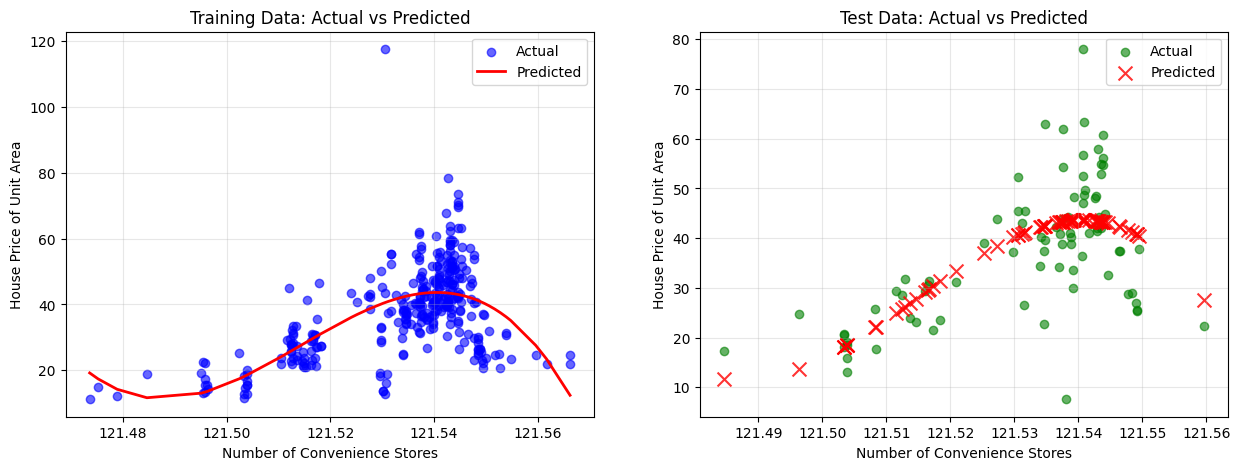

In [115]:
Optimizer.getPlots(92) # Performance Plots for degree 20

## Example Usage over polyreg DataSet

In [116]:
data = pd.read_excel("/workspaces/Supervised-Machine-Learning/Datasets/polyreg.xlsx")
data.head()

,Sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [117]:
polyreg_model = ModelOptimizer(X_variable="Pressure", Data=data, minDegree=0, maxDegree=100, step=2, random_state=123)
polyreg_model.run()

In [118]:
polyreg_model.getPerformanceMetrics()

,0,2,4,6,8,10,12,14,16,18,...,80,82,84,86,88,90,92,94,96,98
RMSE,0.077303,3.512681e-17,9.696646e-10,1.111517e-09,1.112486e-09,1.112491e-09,1.112491e-09,1.112491e-09,1.112491e-09,1.112491e-09,...,1.112491e-09,1.112491e-09,1.112491e-09,1.112491e-09,1.112491e-09,1.112491e-09,1.112491e-09,1.112491e-09,1.112491e-09,1.112491e-09
R2,-27.818299,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
MAE,0.075950,3.447763e-17,6.932414e-10,7.945658e-10,7.952574e-10,7.952613e-10,7.952612e-10,7.952613e-10,7.952613e-10,7.952613e-10,...,7.952613e-10,7.952613e-10,7.952613e-10,7.952613e-10,7.952613e-10,7.952613e-10,7.952613e-10,7.952613e-10,7.952613e-10,7.952613e-10


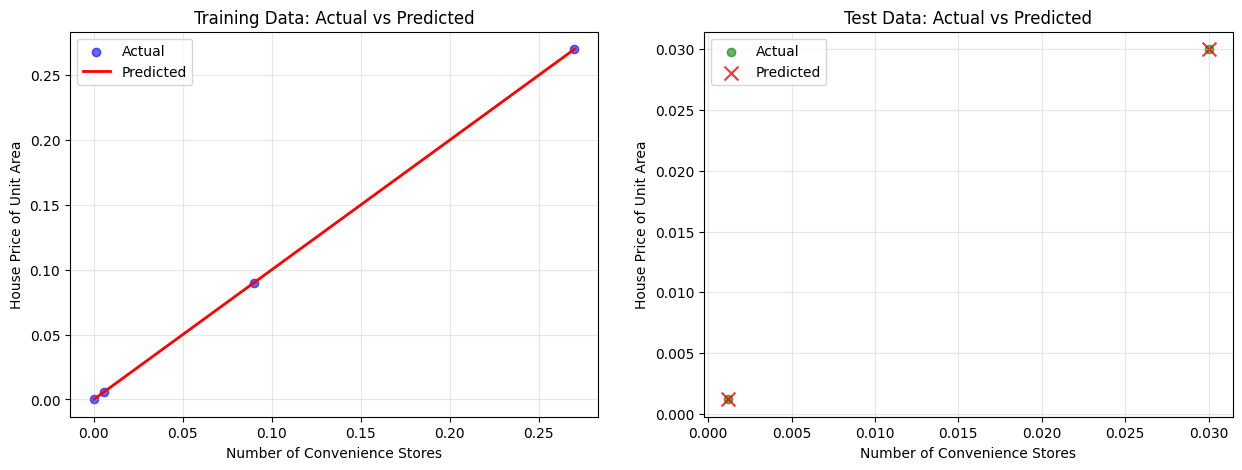

In [119]:
polyreg_model.getPlots(10)

# Polynomial Regression Over Augmented Dataset

## Generating the dataset

In [120]:
np.random.seed(232)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 100)

## Plotting the dataset

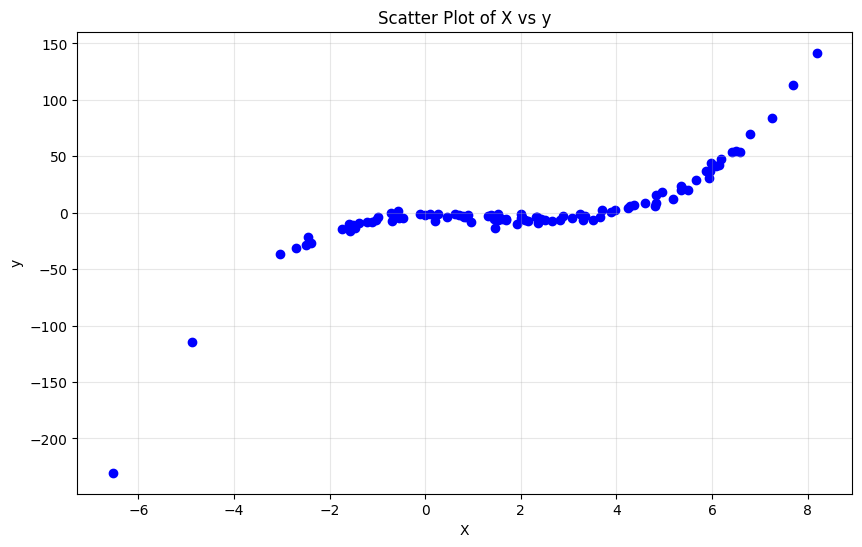

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of X vs y')
plt.grid(True, alpha=0.3)
plt.show()

In [130]:
X = X[:, np.newaxis]
y = y[:, np.newaxis]

model = ModelOptimizer(X_variable="X", Data=pd.DataFrame({'X': X.flatten(), 'y': y.flatten()}), minDegree=1, maxDegree=10, step=1, random_state=101)
model.run()

In [131]:
model.getPerformanceMetrics()

,1,2,3,4,5,6,7,8,9
RMSE,15.466669,17.519595,3.095431,3.099271,3.123239,3.093073,3.072821,3.104461,3.208581
R2,0.515375,0.378187,0.980589,0.980541,0.980238,0.980618,0.980871,0.980475,0.979144
MAE,13.090397,14.822919,2.568761,2.573095,2.569054,2.548954,2.526634,2.558530,2.593441


In [132]:
model.getBestFit()

(7,
 {'RMSE': np.float64(3.0728208603250833),
  'R2': 0.980871254217183,
  'MAE': 2.526633588061458})

In [133]:
y_pred = model.predict(pd.Series(X.flatten()), deg=3)
display(y_pred)

array([ 2.49044363e+01,  3.64707303e+01, -3.31302726e+00,  1.09326479e+01,
        2.16181373e+01,  1.34239941e+01, -4.11779466e+00, -1.06626965e+01,
       -4.46848627e+00,  3.87661678e+00,  1.13427263e+01, -3.03375021e+00,
       -4.80446617e+00, -1.12280778e+02,  4.42693575e+01, -4.17633536e+00,
       -4.58818368e+00, -4.04139302e+00, -4.96901787e+00, -6.60735206e+00,
       -4.48035836e+00,  3.49292065e+01, -2.31630385e+02, -5.08630645e+00,
       -1.52253560e+00, -5.10997387e+00, -4.94137851e+00, -4.97532786e+00,
       -4.94263057e+00,  3.72093068e+01,  4.11700386e+01, -5.11264962e+00,
        1.13764009e+01,  2.91146699e+01, -3.31960821e+00,  5.51890061e+01,
       -3.18967318e+00, -1.21588722e+00, -8.24367806e+00, -3.02650200e+01,
       -2.56168654e+01, -1.11123265e+01, -5.01150296e+00, -2.38605988e+00,
        1.11901382e+02, -3.21232582e+00,  6.14698345e-02, -3.14220709e+00,
       -3.49707395e+00,  3.79989505e+01, -5.11320819e+00, -3.04202931e+00,
        1.43471144e+02,  

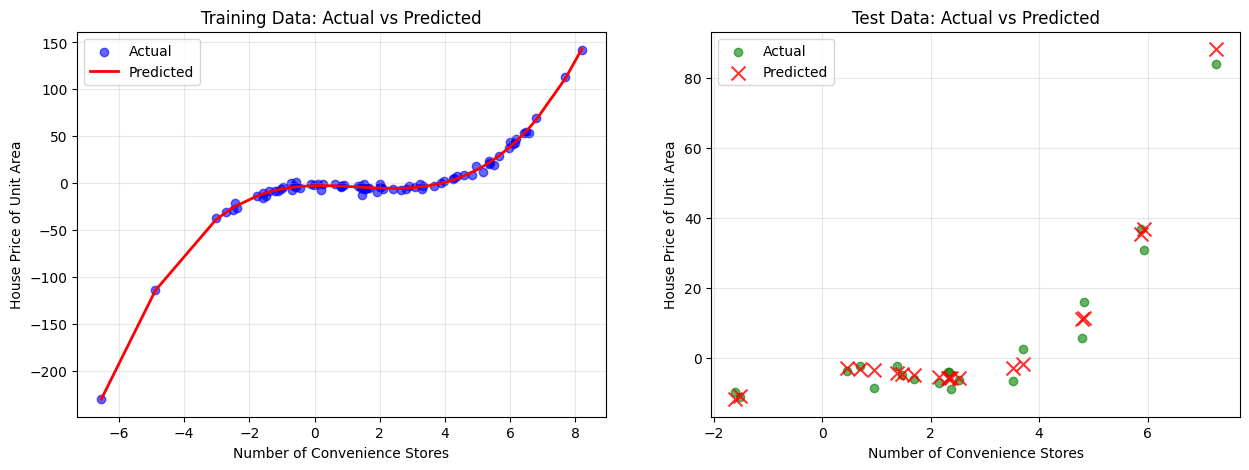

In [134]:
model.getPlots(7)